In [ ]:
import numpy as np
import random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

### 5. Generating Test Data

In [ ]:
def generate_dataset(classA, classB):

    inputs = np.concatenate((classA, classB))
    targets = np.concatenate(
        (np.ones(classA.shape[0]),
        -np.ones(classB.shape[0])))

    N = inputs.shape[0] # num of rows

    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]

    return inputs, targets, N

In [ ]:
classA = np.concatenate(
        (np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
        np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs, targets, N = generate_dataset(classA, classB)

### 6. Plotting the Generated Test Data


In [ ]:
def plotData(classA, classB, grid_args):

    axes = plt.gca()
    axes.set_autoscale_on(False)
    axes.set_xlim([grid_args['grid_x_min'], grid_args['grid_x_max']])
    axes.set_ylim([grid_args['grid_y_min'], grid_args['grid_y_max']])

    plt.plot([p[0] for p in classA],
             [p[1] for p in classA],
             'b.')

    plt.plot([p[0] for p in classB],
             [p[1] for p in classB],
             'r.')

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

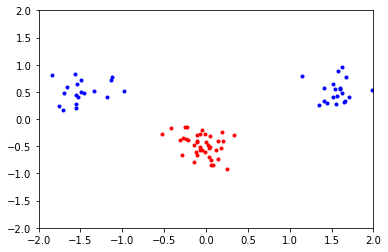

In [ ]:
grid_args = {'grid_x_min':-2, 'grid_x_max':2, 'grid_y_min':-2, 'grid_y_max':2}
plotData(classA, classB, grid_args)

### 4. Implementation
This parameters are just for debbuging/experimenting with the functions

In [ ]:
kernel_args = {'type': 'linear'}

threshold = math.pow(10, -5)
C = None

#### 4.1. Things to implement
- Kernel Functions

In [ ]:
def kernel(p1, p2, kernel_args):
    if kernel_args['type'] == 'linear' or kernel_args['type'] == 'l':
        return np.dot(np.transpose(p1), p2)
    elif kernel_args['type'] == 'polynomial' or kernel_args['type'] == 'p':
        power = kernel_args['power']
        return math.pow((np.dot(np.transpose(p1), p2) + 1), power)
    elif kernel_args['type'] == 'rbf':
        sigma = kernel_args['sigma']
        numerator = np.linalg.norm(p1-p2, 2)**2
        denominator = 2*(sigma**2)
        return math.exp(-(numerator/denominator))
    else:
        print("Wrong type of Kernel function")

- Implement the function objective

In [ ]:
def p_value(ti, tj, kernel):
    return ti*tj*kernel

def calculate_p_matrix(x, t, kernel_args):
    matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            kernel_value = kernel(x[i], x[j], kernel_args)
            matrix[i][j] = t[i]*t[j]*kernel_value
    return matrix

In [ ]:
p_matrix = calculate_p_matrix(inputs, targets, kernel_args)

In [ ]:
def objective(alphas):
    sum_of_alpha = np.sum(alphas)
    alphas_matrix = np.outer(np.transpose(alphas), alphas)
    m_matrix = np.multiply(alphas_matrix, p_matrix)
    return (np.sum(m_matrix)*(1/2)) - sum_of_alpha

- Implement function zerofun

In [ ]:
def zerofun(alphas):
    return np.dot(alphas, targets)

- Call `minimize`

In [ ]:
bounds = [(0, C) for b in range(N)]
XC = [{'type':'eq', 'fun':zerofun}]

ret = minimize(objective, np.zeros(N), bounds=bounds, constraints=XC)
alpha = ret['x']

print(f"New values for alpha: \n{alpha}")

New values for alpha: 
[3.65121373e+03 9.11166480e-02 2.83272110e+00 3.57669963e-02
 6.54329013e+00 6.38608415e-01 1.03743811e-01 7.06847500e-03
 5.05325185e-03 1.08027921e-02 3.25447467e+00 7.08510589e-02
 3.93568542e-01 4.13091741e+00 1.76617706e+04 8.47141597e-01
 3.02530181e-02 6.84395412e-02 2.73887200e-01 3.97366990e+03
 1.12867881e-01 2.18939601e+01 9.96643484e-01 8.64889254e+03
 7.84595598e-02 2.95610956e-02 3.78528988e+00 7.44004174e-01
 5.63345022e+00 1.19657483e-02 1.06737088e+00 3.05756208e-03
 1.56273332e-01 6.27400761e-01 2.05375975e+00 5.26652543e-01
 5.38798122e-02 2.38764897e+00 5.36090456e+00 1.02287759e+03
 5.84117035e-01 1.10185693e+01 3.00741617e+04 4.10998225e-01
 6.75919684e-01 8.21085365e+00 1.20009520e+01 5.74619633e-02
 7.09589381e-02 1.55117356e+04 7.78176991e+03 8.04484415e-01
 1.19537617e+00 5.34872860e+00 6.60482261e+00 3.26832834e+00
 1.46300644e+00 3.28129696e-02 6.33952396e+00 4.73695235e+00
 2.62189093e-01 1.65828586e-02 2.46507118e+04 3.10894369e+00
 

- Extract the non-zerovalues

In [ ]:
def extract_non_zero(alpha, inputs, targets, threshold):
    new_alpha = []
    new_x = []
    new_t = []
  
    for i in range(N):
        if alpha[i] > threshold:
            new_alpha.append(alpha[i])
            new_x.append(inputs[i])
            new_t.append(targets[i])
    
    return {'alpha': new_alpha, 'x': new_x, 't': new_t}

sv = extract_non_zero(alpha, inputs, targets, threshold)

sv_alpha = sv['alpha']
print(f"Alpha for SV: {sv_alpha}")
sv_input = sv['x']
print(f"Points for SV: {sv_input}")
sv_target = sv['t']
print(f"Target for SV: {sv_target}")

Alpha for SV: [3651.213728549902, 0.09111664795938208, 2.8327210999150827, 0.035766996265412264, 6.543290131145089, 0.6386084146428861, 0.10374381120818871, 0.007068475000410701, 0.005053251851330966, 0.010802792072330097, 3.254474670002303, 0.07085105893446694, 0.3935685423388714, 4.1309174101143755, 17661.770603915953, 0.8471415968344809, 0.030253018081145437, 0.06843954120315042, 0.27388720048153936, 3973.669903143496, 0.11286788076495151, 21.893960085216985, 0.9966434836799323, 8648.892540136856, 0.07845955977741097, 0.029561095561251208, 3.785289879198126, 0.7440041741846322, 5.6334502163646345, 0.011965748269715415, 1.067370882721331, 0.003057562084840884, 0.1562733323249036, 0.6274007608628136, 2.0537597510649706, 0.5266525426482854, 0.05387981223479803, 2.387648972518651, 5.360904560387008, 1022.8775911586725, 0.5841170354533374, 11.01856927840476, 30074.161712091423, 0.41099822527054464, 0.6759196838490852, 8.210853650620344, 12.000951999740868, 0.0574619632500494, 0.070958938

- Calculate the b value

In [ ]:
def dual_formula(input, sv_alphas, sv_inputs, sv_targets, kernel_args):
    result = [kernel(input, sv_input, kernel_args) for sv_input in sv_inputs]
    result = np.multiply(sv_targets, result)
    result = np.multiply(sv_alphas, result)
    return np.sum(result)

def calculate_bias(sv_alphas, sv_inputs, sv_targets, kernel_args):
    # choose one support vector to calculate bias
    idx = 0
    result = dual_formula(sv_inputs[idx], sv_alphas, sv_inputs, sv_targets, kernel_args) - sv_targets[idx]
    return result

def indicator_function(input, sv_alphas, sv_inputs, sv_targets, bias, kernel_args):
    # only one input record is needed for inference
    return dual_formula(input, sv_alphas, sv_inputs, sv_targets, kernel_args) - bias

In [ ]:
# just for testing - the values are not realistic
sv_alp = [1,2]
sv_in = [[1,2],[3,4]]
sv_t = [2,1]

calculate_bias(sv_alp, sv_in, sv_t, kernel_args)

30

In [ ]:
bias = calculate_bias(sv_alpha, sv_input, sv_target, kernel_args)

Single point prediction

In [ ]:
indicator_function(inputs[0], sv_alpha, sv_input, sv_target, bias, kernel_args)

1.0

### 6.1. Plotting the Decision Boundary


> SVM

In [ ]:
def buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, plt, merge_plots=True, experiment="plot"):
    N = inputs.shape[0]
    bounds = [(0, C) for b in range(N)]
    XC = [{'type':'eq', 'fun':zerofun}]

    ret = minimize(objective, np.zeros(N), bounds=bounds, constraints=XC)
    alphas = ret['x']

    sv = extract_non_zero(alphas, inputs, targets, threshold)
    bias = calculate_bias(sv['alpha'], sv['x'], sv['t'], kernel_args)

    gridX = np.linspace(grid_args['grid_x_min'], grid_args['grid_x_max'])
    gridY = np.linspace(grid_args['grid_y_min'], grid_args['grid_y_max'])

    grid = np.array([[indicator_function([x,y], sv['alpha'], sv['x'], sv['t'], bias, kernel_args)
            for x in gridX]
            for y in gridY])
    
    if not merge_plots:
        plt.show()

    plt.contour(gridX, gridY, grid, (-1.0, 0.0, 1.0),
        colors = ('red', 'black', 'blue'),
        linewidths = (1, 3, 1))

    plt.savefig(f"{experiment}.pdf")


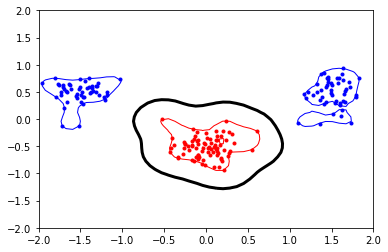

In [ ]:
# hyperparameters
threshold = math.pow(10, -5)
C = None
kernel_args = {'type': 'rbf', 'sigma': 0.2}
grid_args = {'grid_x_min':-2, 'grid_x_max':2, 'grid_y_min':-2, 'grid_y_max':2}
dataplot = plotData(classA, classB, grid_args)

p_matrix = calculate_p_matrix(inputs, targets, kernel_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, merge_plots=True)

### 7. Exploring and reporting
#### 7.1. Move the clusters around and change their sizes


In [ ]:
grid_args = {'grid_x_min':-2, 'grid_x_max':2, 'grid_y_min':-2, 'grid_y_max':2}

# SVM part
threshold = math.pow(10, -5)
C = None
kernel_args = {'type': 'linear'}

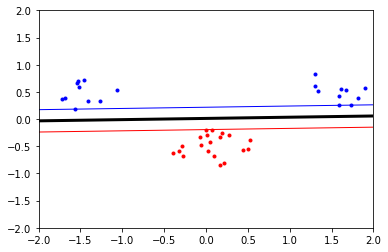

In [ ]:
# data generation part

filename = "plot0" # decent boundary
classA = np.concatenate(
        (np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
        np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs, targets, N = generate_dataset(classA, classB)
dataplot = plotData(classA, classB, grid_args)

p_matrix = calculate_p_matrix(inputs, targets, kernel_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

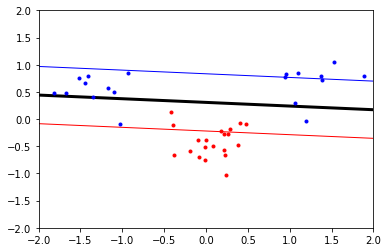

In [ ]:
filename = "plot1" # the clusters are too big

classA = np.concatenate(
        (np.random.randn(10, 2) * 0.3 + [1.5, 0.5],
        np.random.randn(10, 2) * 0.3 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.3 + [0.0, -0.5]

inputs, targets, N = generate_dataset(classA, classB)
dataplot = plotData(classA, classB, grid_args)

p_matrix = calculate_p_matrix(inputs, targets, kernel_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

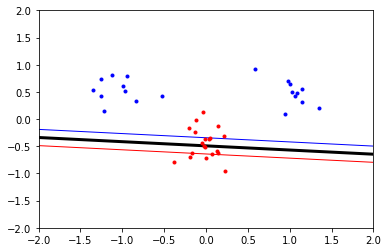

In [ ]:
filename = "plot2" # the clusters are too close to each other

classA = np.concatenate(
        (np.random.randn(10, 2) * 0.2 + [1.0, 0.5],
        np.random.randn(10, 2) * 0.2 + [-1.0, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs, targets, N = generate_dataset(classA, classB)
dataplot = plotData(classA, classB, grid_args)

p_matrix = calculate_p_matrix(inputs, targets, kernel_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

#### 7.3. Explore the parameters of the kernels
- Polynomial Kernel

In [ ]:
grid_args = {'grid_x_min':-2, 'grid_x_max':2, 'grid_y_min':-2, 'grid_y_max':2}

# SVM part
threshold = math.pow(10, -5)
C = None
kernel_args = {'type': 'polynomial', 'power':2}

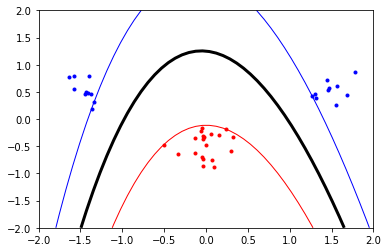

In [ ]:
filename = "plot3" # decent boundary, except if power is too big
classA = np.concatenate(
        (np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
        np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs, targets, N = generate_dataset(classA, classB)
dataplot = plotData(classA, classB, grid_args)

p_matrix = calculate_p_matrix(inputs, targets, kernel_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

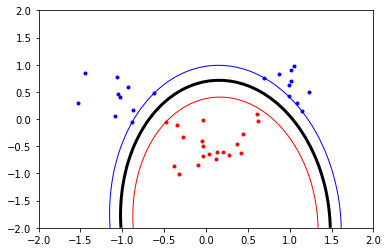

In [ ]:
filename = "plot4" # the clusters are bigger and closer

classA = np.concatenate(
        (np.random.randn(10, 2) * 0.3 + [1.0, 0.5],
        np.random.randn(10, 2) * 0.3 + [-1.0, 0.5]))
classB = np.random.randn(20, 2) * 0.3 + [0.0, -0.5]

inputs, targets, N = generate_dataset(classA, classB)
dataplot = plotData(classA, classB, grid_args)

p_matrix = calculate_p_matrix(inputs, targets, kernel_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

- RBF Kernel

In [ ]:
grid_args = {'grid_x_min':-2, 'grid_x_max':2, 'grid_y_min':-2, 'grid_y_max':2}

# SVM part
threshold = math.pow(10, -5)
C = None
kernel_args = {'type': 'rbf', 'sigma':0.3}

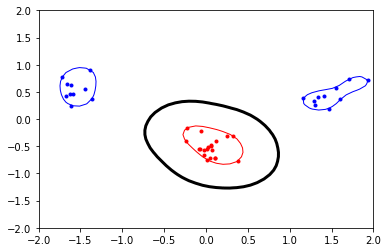

In [ ]:
filename = "plot5" # decent boundary
classA = np.concatenate(
        (np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
        np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs, targets, N = generate_dataset(classA, classB)
dataplot = plotData(classA, classB, grid_args)

p_matrix = calculate_p_matrix(inputs, targets, kernel_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

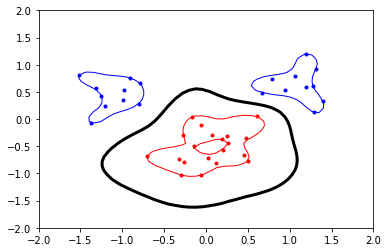

In [ ]:
filename = "plot6" # the clusters are bigger and closer

classA = np.concatenate(
        (np.random.randn(10, 2) * 0.3 + [1.0, 0.5],
        np.random.randn(10, 2) * 0.3 + [-1.0, 0.5]))
classB = np.random.randn(20, 2) * 0.3 + [0.0, -0.5]

inputs, targets, N = generate_dataset(classA, classB)
dataplot = plotData(classA, classB, grid_args)

p_matrix = calculate_p_matrix(inputs, targets, kernel_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

From the three kernels, the linear looks to be the weakest one. It is however not a surprise, as the implementation of it is just a scalar product between two points.

The polynomial kernel allows for curved decision boundaries. This kernel has a hyperparameter *p*, which is the degree of the polynomial. As the degree increases, so does the complexity of the model. More complexity means overfitting and therefore more variance and less bias. 

Finally, the RBF kernel looks to be the most powerful, as it can form circular areas in the decision space, which are very good boundaries. Similarly to the polynomial kernel, we also have a hyperparameter, called *sigma* in this case. The *sigma* parameters changes the smoothness of the boundaries, so that a smaller *sigma* (like 0.1) results in a overfitting model and a higher sigma (like 0.5) results in a general model. Consequently, the higher the *sigma*, the higher the bias and the lower the variance. 

#### 7.4. Explore the slack variable
We chose to use a linear kernel because it's the simplest one, which means that less parameters are influencing the experiment.

Slack variables allows some datapoints to be inside the margin, i.e. misclassified.

The parameter C sets the relative importance of avoiding slack versus getting a wider margin. How do we choose the parameter C?
- if the data is very noisy, choose a *low* C to allow more slack, since those points are noise
- if the data is not too noisy, maybe we don't want to let a lot of points be misclassified and so we should choose a *higher* C


In [ ]:
grid_args = {'grid_x_min':-2, 'grid_x_max':2, 'grid_y_min':-2, 'grid_y_max':2}

# SVM part
threshold = math.pow(10, -5)
kernel_args = {'type': 'linear'}

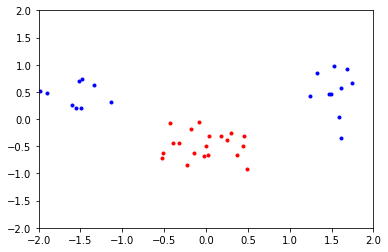

In [ ]:
classA = np.concatenate(
        (np.random.randn(10, 2) * 0.28 + [1.5, 0.5],
        np.random.randn(10, 2) * 0.28 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.28 + [0.0, -0.5]

inputs, targets, N = generate_dataset(classA, classB)
dataplot = plotData(classA, classB, grid_args)

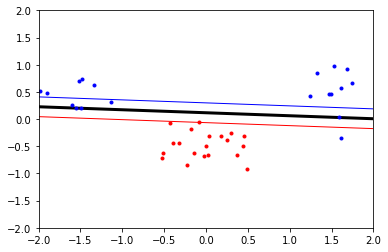

In [ ]:
filename = "plot7" # high C
C = 10
p_matrix = calculate_p_matrix(inputs, targets, kernel_args)

dataplot = plotData(classA, classB, grid_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

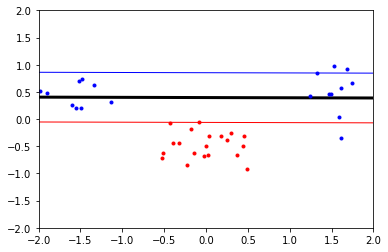

In [ ]:
filename = "plot8" # too low C
C = 0.5
p_matrix = calculate_p_matrix(inputs, targets, kernel_args)

dataplot = plotData(classA, classB, grid_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

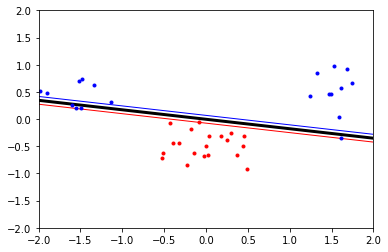

In [ ]:
filename = "plot9" # too high C, almost similar to an SVM without slack
C = 100
p_matrix = calculate_p_matrix(inputs, targets, kernel_args)

dataplot = plotData(classA, classB, grid_args)
buildSVM(inputs, targets, threshold, C, kernel_args, grid_args, dataplot, experiment=filename)

#### 7.5. More slack vs More complex kernel
We should use **slack variables** when the data is not linearly separable (for example, when there is some noise), but if the slack is too big (low C), then almost all of the data will be misclassified.

If you look at the data and see that most points are together apart from some which are outliers, then you can consider that those points are noise. In this case, you should use a high slack (low C) because there's no problem in misclassifying those points in order to get wider margins.

However, if the datapoints looks to be correlated in a complex way or in a case where the clusters are too sparse and intercepting each other, then using a more complex kernel will be a better option. This is because in this case, the data itself its complex so it doesn't make sense to sacrifice a few points with slack just to get a more general model (or wider margins)